In [1]:
pwd

'/home/wsuser/work'

# Load The Image Dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7ae7d099700c4faaa08eda10a6e632fb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pA66945Kvlle-KT7lbohoKAZUwSqk6Jhz5gCNPpQdntS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_2 = client_7ae7d099700c4faaa08eda10a6e632fb.get_object(Bucket='testcnn-donotdelete-pr-ioiozjt56qz9qh', Key='Animal_Dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
ls

# Unzip The Folder

In [7]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [59]:
ls

 Volume in drive C has no label.
 Volume Serial Number is DAF9-1ADD

 Directory of C:\Users\Abinaya Venkatesh\Desktop\Kamalaveni\AI-Day-5-Flask-DL-Deployment\Flask

21-07-2022  11:26    <DIR>          .
21-07-2022  11:26    <DIR>          ..
21-07-2022  11:14    <DIR>          .ipynb_checkpoints
21-07-2022  11:26           229,735 AI-Day-5-CNN-Notebook-DL-Deploy.ipynb
11-07-2022  21:22           648,419 AI-Day-5-CNN-Notebook-DL-Deploy.pdf
11-07-2022  15:51       111,315,760 animal.h5
11-07-2022  20:56               929 app.py
11-07-2022  21:24    <DIR>          static
11-07-2022  21:24    <DIR>          templates
11-07-2022  21:24    <DIR>          uploads
               4 File(s)    112,194,843 bytes
               6 Dir(s)  246,503,235,584 bytes free


In [6]:
pwd

'C:\\Users\\Hp\\Plant Disease\\training files'

# Image Augmentation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [9]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AC7E-C806

 Directory of C:\Users\Hp\Downloads

21-07-2022  02:14 PM    <DIR>          .
21-07-2022  02:14 PM    <DIR>          ..
21-07-2022  02:14 PM    <DIR>          .ipynb_checkpoints
08-07-2022  01:25 PM    <DIR>          [WARNING__Attachment_Unscanned]
08-07-2022  01:25 PM         3,954,476 [WARNING__Attachment_Unscanned].zip
01-07-2022  01:04 PM         1,419,146 [WARNING__ATTACHMENT_UNSCANNED]Re__paper_id_4623.zip
08-05-2022  05:45 PM         1,358,465 [YABIO_113845](1) (1).pdf
02-06-2022  04:29 PM         1,358,465 [YABIO_113845](1) (2).pdf
15-03-2022  11:05 AM         1,358,465 [YABIO_113845](1).pdf
23-10-2021  01:46 PM         1,207,820 03.ECE.pdf
05-05-2022  10:15 AM           409,324 0322SI-IJEER-2022-06 (1).pdf
13-05-2022  03:30 PM         1,203,722 0322SI-IJEER-2022-06 galley.pdf
05-05-2022  10:10 AM           409,324 0322SI-IJEER-2022-06.pdf
04-02-2022  05:23 PM           877,752 07 - Copy-merged.pdf
20-04-2022  03

15-06-2022  10:14 AM             5,953 CH2021228000354_Marks_Report (1).xlsx
17-06-2022  12:13 PM             5,946 CH2021228000354_Marks_Report (2).xlsx
22-06-2022  11:29 AM             5,968 CH2021228000354_Marks_Report (3).xlsx
22-06-2022  01:52 PM             5,966 CH2021228000354_Marks_Report (4).xlsx
22-06-2022  02:18 PM            12,400 CH2021228000354_Marks_Report (5).xlsx
23-06-2022  01:13 PM             5,968 CH2021228000354_Marks_Report (6).xlsx
26-06-2022  11:00 AM             5,966 CH2021228000354_Marks_Report (7).xlsx
10-06-2022  02:07 PM             5,952 CH2021228000354_Marks_Report.xlsx
23-06-2022  12:34 PM             8,065 Challenge test 1 11 4 2022    CH2021222300905      24491    _TestReport.xlsx
11-04-2022  01:28 PM             8,055 Challenge test 1 11 4 2022    CH2021222300905  _TestReport.xlsx
23-06-2022  12:23 PM             7,928 Challenge test 12 4 22    CH2021222300901      24565    _TestReport.xlsx
13-04-2022  01:47 PM             7,914 Challenge test 12 

In [10]:
pwd

'C:\\Users\\Hp\\Plant Disease\\training files'

In [11]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\fruit-dataset\train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [12]:
x_test=test_datagen.flow_from_directory(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\fruit-dataset\test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [13]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

# CNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [15]:
model=Sequential()

In [16]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [20]:
32*(3*3*3+1)

896

# Hidden Layers

In [21]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Output Layer

In [22]:
model.add(Dense(6,activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
len(x_train)

225

In [25]:
1238/24

51.583333333333336

In [26]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=2)

C:\Users\Hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
225/225 [==============================] - 80s 347ms/step - loss: 0.9793 - accuracy: 0.7795 - val_loss: 0.2621 - val_accuracy: 0.9170
Epoch 2/2
225/225 [==============================] - 74s 328ms/step - loss: 0.2570 - accuracy: 0.9157 - val_loss: 0.1413 - val_accuracy: 0.9466


# Saving Model

In [27]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AC7E-C806

 Directory of C:\Users\Hp\Plant Disease\training files

21-07-2022  03:20 PM    <DIR>          .
21-07-2022  03:20 PM    <DIR>          ..
21-07-2022  03:18 PM    <DIR>          .ipynb_checkpoints
21-07-2022  03:20 PM           527,906 AI-Fruit disease classification-Deploy.ipynb
21-07-2022  11:55 AM                30 animal-classification-model.tgz
20-07-2022  09:53 PM             5,141 app.py
21-07-2022  01:08 PM            19,195 check.ipynb
21-07-2022  11:54 AM            86,387 CNN-Binary image classific.ipynb
21-07-2022  09:51 AM    <DIR>          css
20-07-2022  02:35 PM            21,128 fruit.h5
20-07-2022  06:50 PM            12,888 Fruit-Training.ipynb
21-07-2022  11:03 AM        41,499,648 Image_classification_CNN.h5
20-07-2022  08:00 PM         1,858,666 Image_classification_CNN.tgz
21-07-2022  12:24 PM        30,347,744 Image_classification_model.tgz
10-02-2021  05:10 PM             2,827 index.html
21-07-2

In [28]:
model.save('fruit pred.h5')

In [29]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AC7E-C806

 Directory of C:\Users\Hp\Plant Disease\training files

21-07-2022  03:20 PM    <DIR>          .
21-07-2022  03:20 PM    <DIR>          ..
21-07-2022  03:18 PM    <DIR>          .ipynb_checkpoints
21-07-2022  03:20 PM           527,906 AI-Fruit disease classification-Deploy.ipynb
21-07-2022  11:55 AM                30 animal-classification-model.tgz
20-07-2022  09:53 PM             5,141 app.py
21-07-2022  01:08 PM            19,195 check.ipynb
21-07-2022  11:54 AM            86,387 CNN-Binary image classific.ipynb
21-07-2022  09:51 AM    <DIR>          css
21-07-2022  03:20 PM       457,840,128 fruit pred.h5
20-07-2022  02:35 PM            21,128 fruit.h5
20-07-2022  06:50 PM            12,888 Fruit-Training.ipynb
21-07-2022  11:03 AM        41,499,648 Image_classification_CNN.h5
20-07-2022  08:00 PM         1,858,666 Image_classification_CNN.tgz
21-07-2022  12:24 PM        30,347,744 Image_classification_model.tgz
10-0

# Test The Model

In [30]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
#load the model
model=load_model('fruit pred.h5')

In [32]:
img=image.load_img(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\fruit-dataset\test\Apple___healthy\0adc1c5b-8958-47c0-a152-f28078c214f1___RS_HL 7825.JPG")

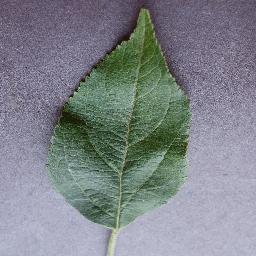

In [33]:
img

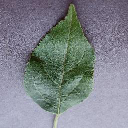

In [34]:
img=image.load_img(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\fruit-dataset\test\Apple___healthy\0adc1c5b-8958-47c0-a152-f28078c214f1___RS_HL 7825.JPG",target_size=(128,128))
img

In [35]:
x=image.img_to_array(img)

In [36]:
x

array([[[ 99.,  86., 106.],
        [101.,  88., 108.],
        [118., 105., 125.],
        ...,
        [ 92.,  83., 102.],
        [ 93.,  84., 103.],
        [ 89.,  80.,  99.]],

       [[ 96.,  83., 103.],
        [ 87.,  74.,  94.],
        [102.,  89., 109.],
        ...,
        [ 88.,  79.,  98.],
        [ 89.,  80.,  99.],
        [ 83.,  74.,  93.]],

       [[ 86.,  73.,  93.],
        [ 88.,  75.,  95.],
        [ 98.,  85., 105.],
        ...,
        [107.,  98., 117.],
        [ 96.,  87., 106.],
        [ 96.,  87., 106.]],

       ...,

       [[172., 175., 194.],
        [173., 176., 195.],
        [175., 178., 197.],
        ...,
        [179., 180., 198.],
        [184., 185., 203.],
        [179., 180., 198.]],

       [[172., 175., 194.],
        [170., 173., 192.],
        [173., 176., 195.],
        ...,
        [178., 179., 197.],
        [182., 183., 201.],
        [178., 179., 197.]],

       [[169., 172., 191.],
        [166., 169., 188.],
        [168., 1

In [37]:
x=np.expand_dims(x,axis=0)

In [38]:
x

array([[[[ 99.,  86., 106.],
         [101.,  88., 108.],
         [118., 105., 125.],
         ...,
         [ 92.,  83., 102.],
         [ 93.,  84., 103.],
         [ 89.,  80.,  99.]],

        [[ 96.,  83., 103.],
         [ 87.,  74.,  94.],
         [102.,  89., 109.],
         ...,
         [ 88.,  79.,  98.],
         [ 89.,  80.,  99.],
         [ 83.,  74.,  93.]],

        [[ 86.,  73.,  93.],
         [ 88.,  75.,  95.],
         [ 98.,  85., 105.],
         ...,
         [107.,  98., 117.],
         [ 96.,  87., 106.],
         [ 96.,  87., 106.]],

        ...,

        [[172., 175., 194.],
         [173., 176., 195.],
         [175., 178., 197.],
         ...,
         [179., 180., 198.],
         [184., 185., 203.],
         [179., 180., 198.]],

        [[172., 175., 194.],
         [170., 173., 192.],
         [173., 176., 195.],
         ...,
         [178., 179., 197.],
         [182., 183., 201.],
         [178., 179., 197.]],

        [[169., 172., 191.],
       

In [39]:
y=np.argmax(model.predict(x),axis=1)

In [40]:
y

array([1], dtype=int64)

In [41]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [42]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [43]:
index[y[0]]

'Apple___healthy'

In [44]:
img=image.load_img(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\fruit-dataset\test\Peach___Bacterial_spot\0bb77fcc-27ca-474f-beae-6b3519727cf9___Rutg._Bact.S 1901.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Peach___Bacterial_spot'

In [45]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from flask import Flask,render_template,request

In [ ]:
app=Flask(__name__)

model=load_model("fruit pred.h5")

@app.route('/')
def index():
    return render_template("index.html")

@app.route('/predict',methods=['GET','POST'])
def upload():
    if request.method=='POST':
        f=request.files['image']
        basepath=os.path.dirname('__file__')
        filepath=os.path.join(basepath,'uploads',f.filename)
        f.save(filepath)
        img=image.load_img(filepath,target_size=(128,128))
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        pred=np.argmax(model.predict(x),axis=1)
        index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
        text="The Classified Fruit disease is : " +str(index[pred[0]])
    return text
if __name__=='__main__':
    app.run(debug=False)

# IBM Deployment

In [56]:
!pip install watson-machine-learning-client 

     |████████████████████████████████| 538 kB 20.6 MB/s eta 0:00:01


In [57]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"X9lCJTUTrrIfLVrxsKf8yLyI1KHb3JVoY7QrWy1zilb2"
}

client=APIClient(wml_credentials)

In [58]:
client

In [59]:
def guid_space_name(client,fruit_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==fruit_deploy)['metadata']['id'])